In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [18]:
train = pd.read_csv("../data/train.csv")

print(train.shape)
train.head()

target filename
0                
1      d    1.jpg
2      c    2.jpg
3      c    3.jpg
4      c    4.jpg

In [11]:
test = pd.read_csv("../data/test.csv")

print(test.shape)
test.head()

(2000, 2)


filename  target
0    0.jpg       0
1    1.jpg       0
2    2.jpg       0
3    3.jpg       0
4    4.jpg       1

## Load Images

In [12]:
# from matplotlib.pyplot import imread
from scipy.ndimage import imread

def load_images(filenames, default_path):
    images = []

    for filename in filenames:
        filepath = default_path + filename

        image = imread(filepath)
        images.append(image)

    images = np.array(images)

    return images

In [13]:
X_train = load_images(train["filename"], "../data/train/")
X_train.shape

/Users/daejune/anaconda3/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(2000,)

In [14]:
X_test = load_images(test["filename"], "../data/test/")
X_test.shape

/Users/daejune/anaconda3/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(2000,)

In [15]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(2000,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [16]:
y_test = test["target"].values

print(y_test.shape)
y_test[0:10]

(2000,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

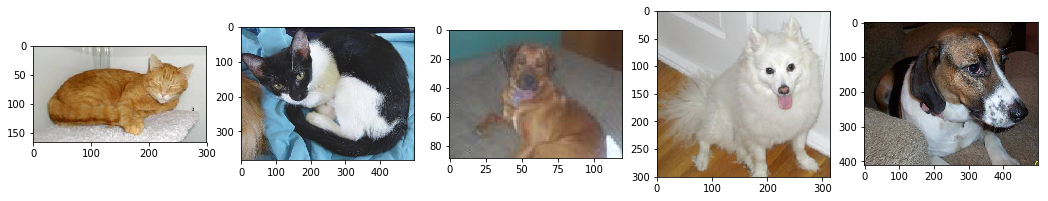

In [17]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

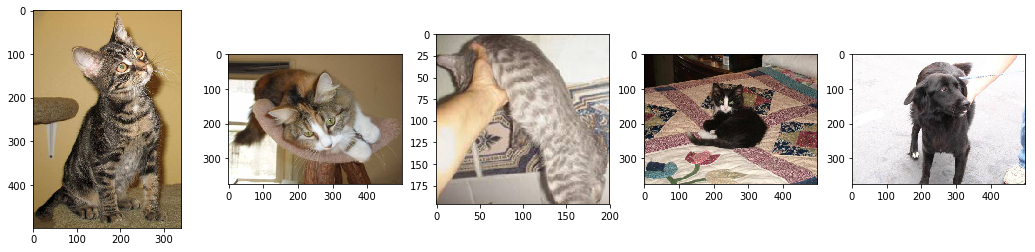

In [18]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test[0])
axes[1].imshow(X_test[1])
axes[2].imshow(X_test[2])
axes[3].imshow(X_test[3])
axes[4].imshow(X_test[4])

## Preprocessing

### Resize Images

In [19]:
from tqdm import tqdm
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in tqdm(original_images):
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

In [20]:
X_train_224 = resize_image(X_train, (224, 224))
X_train_224.shape

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/daejune/anaconda3/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
100%|██████████| 2000/2000 [00:05<00:00, 398.06it/s]


(2000, 224, 224, 3)

In [21]:
X_test_224 = resize_image(X_test, (224, 224))
X_test_224.shape

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/daejune/anaconda3/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
100%|██████████| 2000/2000 [00:04<00:00, 410.39it/s]


(2000, 224, 224, 3)

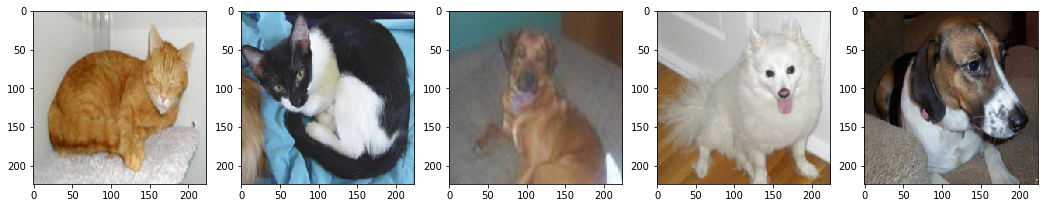

In [22]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train_224[0])
axes[1].imshow(X_train_224[1])
axes[2].imshow(X_train_224[2])
axes[3].imshow(X_train_224[3])
axes[4].imshow(X_train_224[4])

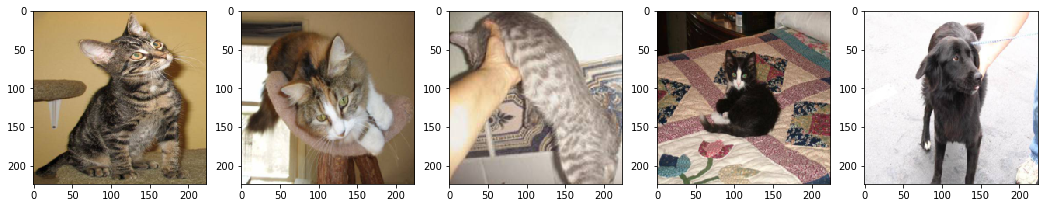

In [23]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test_224[0])
axes[1].imshow(X_test_224[1])
axes[2].imshow(X_test_224[2])
axes[3].imshow(X_test_224[3])
axes[4].imshow(X_test_224[4])

## Build a Model

### Tiny CNN Model

In [28]:
# Write your code here!
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def conv3x3(filters, input_shape = ()):
    return Conv2D(filters = filters,
                  kernel_size = (3, 3),
                  activation = 'relu',
                  padding = 'same',
                  kernel_initializer = 'he_uniform',
                  input_shape = input_shape)

                 
def maxpooling():
    return MaxPooling2D()


model = Sequential()

model.add(conv3x3(filters = 16, input_shape = (224, 224, 3)))
model.add(conv3x3(filters = 16))
model.add(maxpooling())
model.add(conv3x3(filters = 32))
model.add(conv3x3(filters = 32))
model.add(maxpooling())
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
__________

In [30]:
from keras.optimizers import SGD

optimizer = SGD(lr = 0.00001)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
model.fit(X_train_224, y_train, epochs = 1)

Epoch 1/1
2000/2000 [==============================] - 213s 106ms/step - loss: 8.0593 - acc: 0.4980


### VGG-16 w/ Pre-trained Model

In [32]:
!pip install h5py

In [41]:
# Write your code here!
def conv3x3(filters, input_shape = ()):
    return Conv2D(filters = filters,
                  kernel_size = (3, 3),
                  activation = 'relu',
                  padding = 'same',
                  trainable = False,
                  input_shape = input_shape)

                 
def maxpooling():
    return MaxPooling2D()

model = Sequential()

model.add(conv3x3(filters = 64, input_shape = (224, 224, 3)))
model.add(conv3x3(filters = 64))
model.add(maxpooling())
model.add(conv3x3(filters = 128))
model.add(conv3x3(filters = 128))
model.add(maxpooling())
model.add(conv3x3(filters = 256))
model.add(conv3x3(filters = 256))
model.add(conv3x3(filters = 256))
model.add(maxpooling())
model.add(conv3x3(filters = 512))
model.add(conv3x3(filters = 512))
model.add(conv3x3(filters = 512))
model.add(maxpooling())
model.add(conv3x3(filters = 512))
model.add(conv3x3(filters = 512))
model.add(conv3x3(filters = 512))
model.add(maxpooling())

model.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [42]:
from keras.optimizers import SGD

optimizer = SGD(lr = 0.00001)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
model.fit(X_train_224, y_train, epochs = 1)

Epoch 1/1
 800/2000 [===========>..................] - ETA: 11:33 - loss: 3.8288 - acc: 0.5550

KeyboardInterrupt: 